Linear Regression - MSE: 24.5873, R2 Score: 0.5923
AdaBoost Regression - MSE: 19.8158, R2 Score: 0.6714
XGBoost Regression - MSE: 19.1901, R2 Score: 0.6818
Gradient Boosting Regression - MSE: 17.8845, R2 Score: 0.7035
Random Forest Regression - MSE: 14.0622, R2 Score: 0.7668

Model Performance Comparison:
Linear Regression: MSE = 24.5873, R2 Score = 0.5923
AdaBoost Regression: MSE = 19.8158, R2 Score = 0.6714
XGBoost Regression: MSE = 19.1901, R2 Score = 0.6818
Gradient Boosting Regression: MSE = 17.8845, R2 Score = 0.7035
Random Forest Regression: MSE = 14.0622, R2 Score = 0.7668


<ipython-input-3-deef9f7e34a0>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


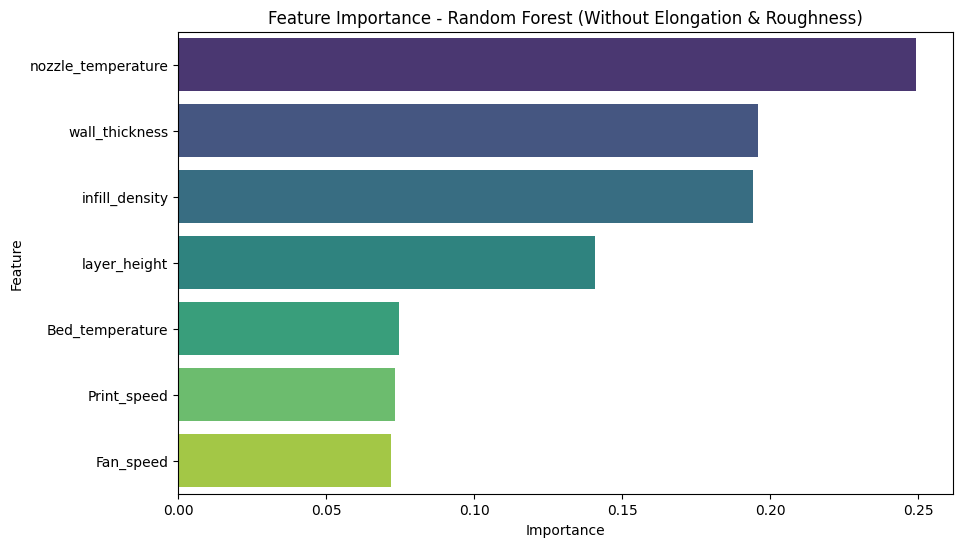

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML MODEL.csv")  # Ensure correct file path

# Define target column
target_column = "Tensile_strength"  # Update based on dataset

# Check if the target column exists
if target_column not in df.columns:
    print("Available Columns:", df.columns.tolist())
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Drop non-numeric columns
df = df.select_dtypes(include=[np.number])

# Ensure 'Elongation' and 'Roughness' are not included
columns_to_remove = ["Elongation", "Roughness"]
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors="ignore")

# Ensure target column is still present after dropping
if target_column not in df.columns:
    raise ValueError(f"After dropping non-numeric columns, '{target_column}' is missing!")

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "AdaBoost Regression": AdaBoostRegressor(n_estimators=50, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

# Display results
print("\nModel Performance Comparison:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R2 Score = {metrics['R2 Score']:.4f}")

# Feature Importance Visualization (without 'Elongation' and 'Roughness')
rf_importance = models["Random Forest Regression"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importance
})

# Ensure 'Elongation' and 'Roughness' are removed
feature_importance_df = feature_importance_df[~feature_importance_df["Feature"].isin(["Elongation", "Roughness"])]
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest (Without Elongation & Roughness)")
plt.show()


In [ ]:
#user input for feature values (excluding 'Elongation' and 'Roughness')
input_features = {}
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    input_features[feature] = value

# Convert input to a NumPy array and reshape for prediction
input_array = np.array([list(input_features.values())]).reshape(1, -1)

# Make prediction using trained Random Forest model
predicted_tensile_strength = models["Random Forest Regression"].predict(input_array)

# Display result
print(f"Predicted Tensile Strength: {predicted_tensile_strength[0]:.4f}")

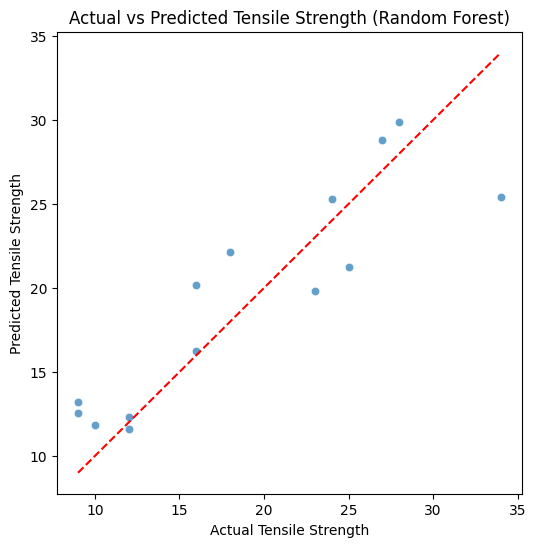

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from the trained Random Forest model
rf_model = models["Random Forest Regression"]  # Retrieve the trained model
y_pred_rf = rf_model.predict(X_test)  # Make predictions

# Scatter plot: Actual vs. Predicted values
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Actual vs Predicted Tensile Strength (Random Forest)")
plt.show()


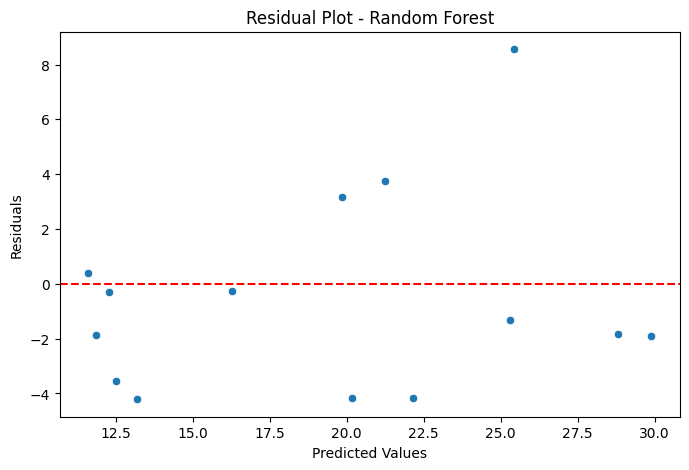

In [17]:
import numpy as np

y_pred_rf = models["Random Forest Regression"].predict(X_test)
residuals = y_test - y_pred_rf  # Difference between actual and predicted

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
